In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import ipywidgets as widgets
import shapefile as shp
import matplotlib.ticker as ticker


def read_shapefile(file_address):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    To use this function, you need to install pyshp first
    """
    import shapefile as shp
    sf = shp.Reader(file_address)
    shapes = sf.shapes()
    points = shapes[0].points
    x_lon = [i[0] for i in points]
    y_lat = [i[1] for i in points]
    return x_lon, y_lat


def plot2d(parameter1, parameter2, parameter3, parameter4, parameter5):
    # parametr1 --> seismic parameters like vp, vs, density
    # parametr2 --> depth
    # parameter3 --> gridding method such as linear, nearest, cubic
    df = pd.read_csv("inv/plot3d/complete_file.csv")
    physical_parameter = parameter1
    zlevel = parameter2
    method = parameter3
    depth_delta = 100
    df = df[(df["depth"] < zlevel + depth_delta) & (df["depth"] > zlevel - depth_delta)].reset_index(drop=True)
    lat = df["lat"]
    lon = df["lon"]
    depth = df["depth"]
    m = df[physical_parameter]
    sta = df["sta"]
    
    # Interpolate
    resolution = parameter4

    x = np.linspace(lon.min(), lon.max(), resolution)
    y = np.linspace(lat.min(), lat.max(), resolution)
    grid_x, grid_y = np.meshgrid(x, y, indexing='ij')
    grid_m = griddata((lon, lat), m, (grid_x, grid_y), method=method)
    kw = {
        "levels": np.linspace(m.min(), m.max(), 10)
    }
    # plot
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    C = ax.contour(grid_x, grid_y, grid_m, **kw)
    # ax.contour(grid_x, grid_y, grid_m, colors='black', linewidths=0.5, levels = 10)

    # Set labels and zticks
    ax.set(
        xlabel='Lon. [deg]',
        ylabel='Lat. [deg]',
    )
    #plotting stations and colorbar
    label = {"vp": "Vp [km/s]", "vs": "Vs [km/s]", "rho": "Density [g/cm^3]", "dip": "Dip [deg]", "ani": "Anisotropy [%]"}
    fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label=label[parameter1])
    for i, txt in enumerate(sta):
        ax.scatter(lon[i], lat[i], c='r', s=10, marker='o')
        rnd_vl_lat = np.random.uniform(-1, 1)*0.1
        rnd_vl_lon = np.random.uniform(-1, 1)*0.1
        ax.text(lon[i]+rnd_vl_lon, lat[i]+rnd_vl_lat, txt, color='black', fontsize=8, visible=True)
    #plotting shapefile
    if parameter5:
        x_lon, y_lat = read_shapefile("Hudbay/HudsonBay.shp")
        ax.plot(x_lon, y_lat, color="black", linewidth=1.5)

    ax.set_xlim(lon.min()-1, lon.max()+1)
    ax.set_ylim(lat.min()-1, lat.max()+1)
    fmt = ticker.LogFormatterMathtext()
    fmt.create_dummy_axis()
    ax.clabel(C, fmt=fmt, inline=True, fontsize=10, colors='black')

    plt.grid()
    plt.show()

parameter1 = widgets.Dropdown(options=["vp", "vs", "rho", "dip", "ani"], description='Attribute:', value='vs')
parameter2 = widgets.IntSlider(min=0, max=50000, step=2000, description='Depth [km]:', value=0)
parameter3 = widgets.Dropdown(options=["nearest", "linear", "cubic"], description='Gridding method:', value='linear')
parameter4 = widgets.IntSlider(min=20, max=200, step=10, description='Resolution:', value=100)
parameter5 = widgets.Checkbox(value=False, description='HudsonBay shapefile')
widgets.interactive(plot2d, parameter1=parameter1, parameter2=parameter2, parameter3=parameter3, parameter4=parameter4, parameter5=parameter5)


interactive(children=(Dropdown(description='Attribute:', index=1, options=('vp', 'vs', 'rho', 'dip', 'ani'), v…

# 3D plot

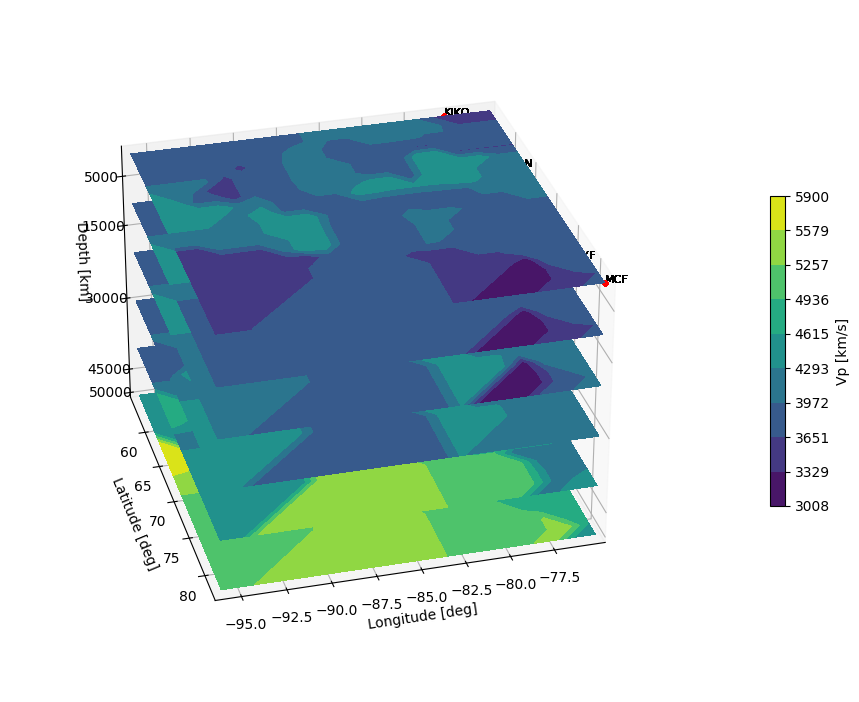

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import ipywidgets as widgets

df = pd.read_csv("inv/plot3d/complete_file.csv")
lat = df["lat"]
lon = df["lon"]
depth = df["depth"]
m = df["vs"]
sta = df["sta"]

# Interpolate
zlevels = 6
resolution = 20

x = np.linspace(lon.min(), lon.max(), resolution)
y = np.linspace(lat.min(), lat.max(), resolution)
z = np.linspace(depth.min(), depth.max(), zlevels)
grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')
grid_m = griddata((lon, lat, depth), m, (grid_x, grid_y, grid_z), method='nearest')
kw = {
    "levels": np.linspace(m.min(), m.max(), 10)
}

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
#z
for i in range(zlevels):
    C = ax.contourf(grid_x[:,:,i], grid_y[:,:,i], grid_m[:,:,i], zdir='z', offset=grid_z[:,:,i].min(), **kw)
    
xmin, xmax = grid_x.min(), grid_x.max()
ymin, ymax = grid_y.min(), grid_y.max()
zmin, zmax = grid_z.min(), grid_z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])


# Set labels and zticks
ax.set(
    xlabel='Longitude [deg]',
    ylabel='Latitude [deg]',
    zlabel='Depth [km]',
    zticks=[5000, 15000, 30000, 45000, 50000],
)

ax.view_init(-150, -75)
ax.set_box_aspect(None, zoom=0.9)

fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Vp [km/s]')
for i, txt in enumerate(sta):
    ax.scatter(lon[i], lat[i], -1, c='r', s=10, marker='o', label='station')
    ax.text(lon[i], lat[i], -1, txt, color='black', fontsize=8, visible=True)
plt.show()


In [90]:
import numpy as np

x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
z = np.random.rand(10)
X, Y = np.meshgrid(x, y)
df = pd.DataFrame({"x": x, "y": y, "z": z})
Z = df.pivot_table(index="x", columns="y", values="z").T.values
Z


array([[0.73445556,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan, 0.69941662,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan, 0.43601407,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.98709691,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan, 0.3846577 ,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
        0.68589198,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan, 0.44844033,        nan,        nan,        nan],
       [       nan,        nan,        na

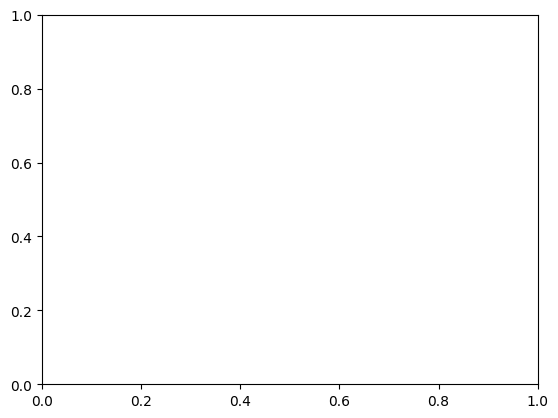

In [88]:
plt.contour(X, Y, Z)